In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import pickle
import json

In [3]:
house_price = pd.read_csv("USA_Housing.csv")
house_price.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
house_price.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

<AxesSubplot:xlabel='Price'>

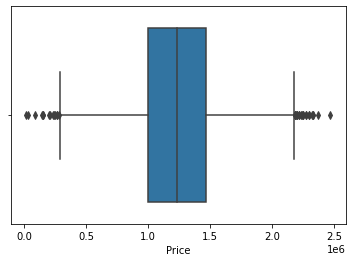

In [6]:
sns.boxplot(house_price["Price"])
# house price can vary according to Area in which they are situated so we will not consider this as outliers

<AxesSubplot:xlabel='Area Population'>

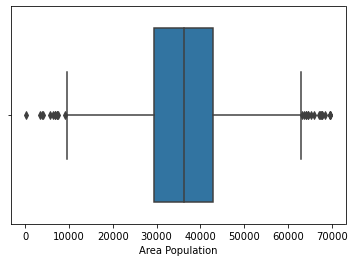

In [7]:
sns.boxplot(house_price["Area Population"])
#same goes with population

<AxesSubplot:xlabel='Avg. Area Number of Bedrooms'>

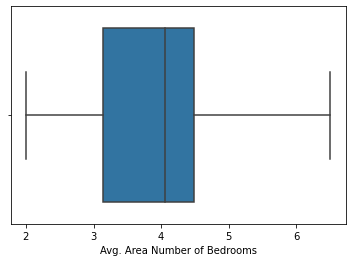

In [8]:
sns.boxplot(house_price["Avg. Area Number of Bedrooms"])
# this a perfectly balance. their are no outliers in this column


<AxesSubplot:xlabel='Avg. Area Number of Rooms'>

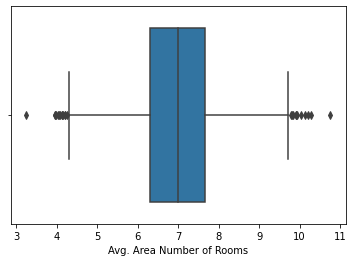

In [9]:
sns.boxplot(house_price["Avg. Area Number of Rooms"])
# we need to handle some outliers here

In [10]:
house_price["Avg. Area Number of Rooms"] = np.where(~house_price["Avg. Area Number of Rooms"].between(4.2,9.7),
                                                   house_price["Avg. Area Number of Rooms"].mean, 
                                                    house_price["Avg. Area Number of Rooms"])

In [11]:
house_price.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [12]:
house_price= house_price.drop("Address", axis = 1)

In [13]:
house_price

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [14]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   object 
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(5), object(1)
memory usage: 234.5+ KB


In [24]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4975 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [37]:
house_price["Avg. Area Number of Rooms"].isna().sum()

25

In [39]:
house_price["Avg. Area Number of Rooms"] = house_price["Avg. Area Number of Rooms"].fillna(0)

In [40]:
house_price["Avg. Area Number of Rooms"] = pd.to_numeric (house_price["Avg. Area Number of Rooms"],errors='coerce')

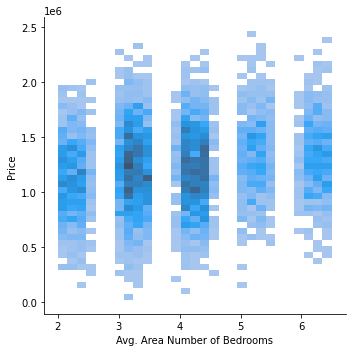

In [41]:
sns.displot(x = house_price["Avg. Area Number of Bedrooms"] , y = house_price["Price"])

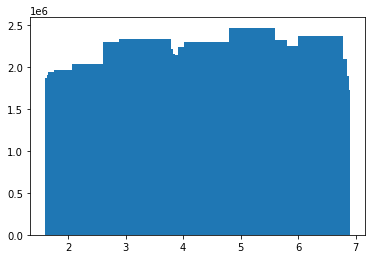

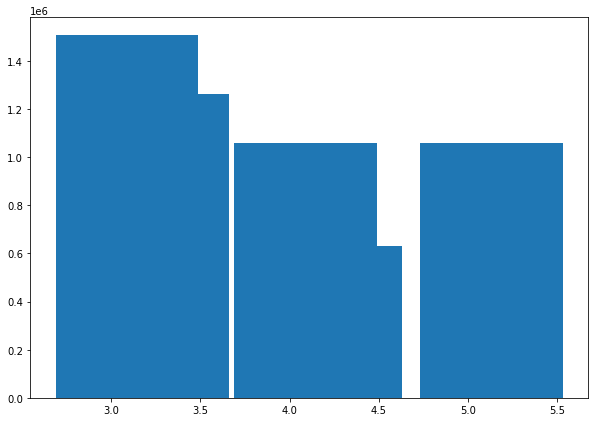

In [42]:
plt.bar(house_price["Avg. Area Number of Bedrooms"], house_price["Price"])
name = house_price['Avg. Area Number of Bedrooms'].head(5)
price = house_price['Price'].head(5)
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(name[0:10], price[0:10])
 
# Show Plot
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

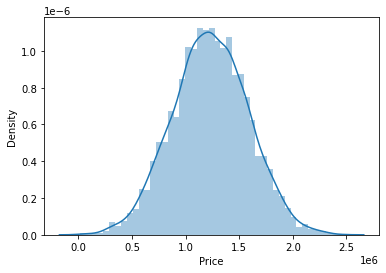

In [43]:
sns.distplot(house_price["Price"])

In [44]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [45]:
house_price

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


### Train_test_split

In [46]:
x = house_price.drop("Price", axis = 1)
y = house_price["Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 4)

In [47]:
x_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2599,88933.198511,6.213762,7.082952,5.50,52976.310410
3847,73998.976047,5.702047,4.779415,3.20,49947.480991
1012,63805.700599,7.120304,5.907901,4.35,48433.820791
3714,77286.537048,8.581135,6.927331,2.40,32405.633936
3080,61482.978798,4.376969,7.794518,5.02,34993.841404
...,...,...,...,...,...
3671,67097.092120,6.086754,7.211963,3.05,27191.506877
709,62357.030953,6.725271,7.126592,5.00,23382.539386
2487,79687.761870,6.010368,7.337394,6.09,20867.669885
174,83347.669697,5.468158,5.475253,3.14,48226.718928


In [48]:
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2175,66083.165901,4.213323,8.908381,4.17,39185.995034
3156,56180.591431,6.201921,7.180671,4.27,41036.284152
337,77733.731186,5.624500,5.967832,3.23,32074.575986
444,47065.053303,5.767575,7.266028,5.49,24125.875810
2334,71028.175896,3.895831,6.623776,2.50,43922.630172
...,...,...,...,...,...
2163,67559.666715,6.873592,7.157964,5.05,32487.567672
4117,57060.096270,4.513982,7.189526,3.02,36853.694575
2185,71579.126401,6.001140,6.166459,2.44,40130.540768
3128,45318.674181,5.709233,6.925561,2.36,47223.164270


In [49]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [50]:
house_price

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


### Model Training

In [51]:
model = LinearRegression()
model

LinearRegression()

In [52]:
model.fit(x_train, y_train)

LinearRegression()

In [55]:
y_predt = model.predict(x_test)

mse = mean_squared_error(y_test, y_predt)
print("Mean squared error is : ", mse)

rmse = np.sqrt(mse)
print("root mean squared error is : ", rmse)

mae = mean_absolute_error(y_test, y_predt)
print("Mean absoulte error: ", mae)

R2_value = r2_score(y_test, y_predt)
print("R2_score is : ", R2_value)

Mean squared error is :  13662263142.942242
root mean squared error is :  116885.68408039644
Mean absoulte error:  87016.14532078498
R2_score is :  0.8895311638161074


### training

In [56]:
y_predt_train = model.predict(x_train)

mse = mean_squared_error(y_train, y_predt_train)
print("Mean squared error is : ", mse)

rmse = np.sqrt(mse)
print("root mean squared error is : ", rmse)

mae = mean_absolute_error(y_train, y_predt_train)
print("Mean absoulte error: ", mae)

R2_value = r2_score(y_train, y_predt_train)
print("R2_score is : ", R2_value)

Mean squared error is :  13974104325.373228
root mean squared error is :  118212.11581463732
Mean absoulte error:  88216.38712803659
R2_score is :  0.8882846030944378


### testing on single row


In [58]:
x.head(1).T

,0
Avg. Area Income,79545.458574
Avg. Area House Age,5.682861
Avg. Area Number of Rooms,7.009188
Avg. Area Number of Bedrooms,4.090000
Area Population,23086.800503


In [61]:
model.predict([[60567.944140,7.830362,6.137356,3.46,22837.361035]])

array([1092132.17791643])

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [66]:
with open ("Usa_house_price.pkl", "wb")as f:
    pickle.dump(model,f)

In [69]:
house_price.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [70]:
project_data = {'columns': list(x.columns)}

In [71]:
with open('project_data.json', 'w') as f:
    json.dump(project_data, f)

In [ ]:
f, ax = plt.subplots(figsize=(10,8))
corr = house_price.corr()
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=np.bool),
           cmap = sns.diverging_palette(240, 10, as_cmap = True), 
           square = True, ax = ax)